## 1. Importing packages and data
<p><img src="https://assets.datacamp.com/production/project_458/img/candy.jpg" alt="Bowl of halloween candy"></p>
<p>Every year around Halloween it seems like everyone has candy on the brain! There's a great dataset from <a href="https://fivethirtyeight.com/">FiveThirtyEight</a> that includes all sorts of different information about different kinds of candy. For example, is a candy chocolaty? Does it have nougat? How does its cost compare to other candies? How many people prefer one candy over another?</p>
<p>We'll take a whirlwind tour of this dataset and wrap up by trying linear and logistic regression techniques out on it!</p>
<p>First things first, let's get our packages and data loaded up and inspect the data to see exactly what we're dealing with.</p>

In [47]:
# # Load all the packages
# # .... YOUR CODE FOR TASK 1 ....
# library(dplyr)
# library(tidyr)
# library(ggplot2)
# library(broom)
# library(corrplot)
# library(fivethirtyeight)

# # Load the candy_rankings dataset from the fivethirtyeight package
# data(candy_rankings)

# # Take a glimpse() at the dataset
# # .... YOUR CODE FOR TASK 1 ....
# glimpse(candy_rankings)
# # head(candy_rankings)

# Load all the packages we need
library(dplyr)
library(tidyr)
library(ggplot2)
library(broom)
library(corrplot)
library(fivethirtyeight)

# Load the candy_rankings dataset from the fivethirtyeight package
data(candy_rankings)

# Take a glimpse() at the dataset
glimpse(candy_rankings)

Rows: 85
Columns: 13
$ competitorname   <chr> "100 Grand", "3 Musketeers", "One dime", "One quarter…
$ chocolate        <lgl> TRUE, TRUE, FALSE, FALSE, FALSE, TRUE, TRUE, FALSE, F…
$ fruity           <lgl> FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE…
$ caramel          <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE,…
$ peanutyalmondy   <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, TRUE, TRUE, …
$ nougat           <lgl> FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE,…
$ crispedricewafer <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE…
$ hard             <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALS…
$ bar              <lgl> TRUE, TRUE, FALSE, FALSE, FALSE, TRUE, TRUE, FALSE, F…
$ pluribus         <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, TRUE…
$ sugarpercent     <dbl> 0.732, 0.604, 0.011, 0.011, 0.906, 0.465, 0.604, 0.31…
$ pricepercent     <dbl> 0.860, 0.511, 0.116, 0.511, 0.511, 0.767, 0.767, 0.51…
$ winpercent       

## 2. Explore the distributions of categorical variables
<p>Let's get started by looking at the distributions of each binary categorical variable. There are quite a few of them - we'll have to do some data wrangling to get them in shape for plotting. </p>
<p>We can get a sense of the proportion of <code>TRUE</code>s and <code>FALSE</code>s in each column by using the <code>gather()</code> function to get the dataset to look like this:</p>
<pre><code>  competitorname sugarpercent pricepercent winpercent feature   value
  &lt;chr&gt;                 &lt;dbl&gt;        &lt;dbl&gt;      &lt;dbl&gt; &lt;chr&gt;     &lt;lgl&gt;
1 100 Grand             0.732        0.860       67.0 chocolate TRUE 
2 3 Musketeers          0.604        0.511       67.6 chocolate TRUE 
3 One dime              0.011        0.116       32.3 chocolate FALSE
</code></pre>
<p>Then we can make a bar chart showing the number of <code>TRUE</code>s and <code>FALSE</code>s for each type of candy (<code>feature</code>).</p>
<p>Note: Development on <code>gather()</code> is complete, but it is still taught in several DataCamp courses. We will continue to use it here.</p>

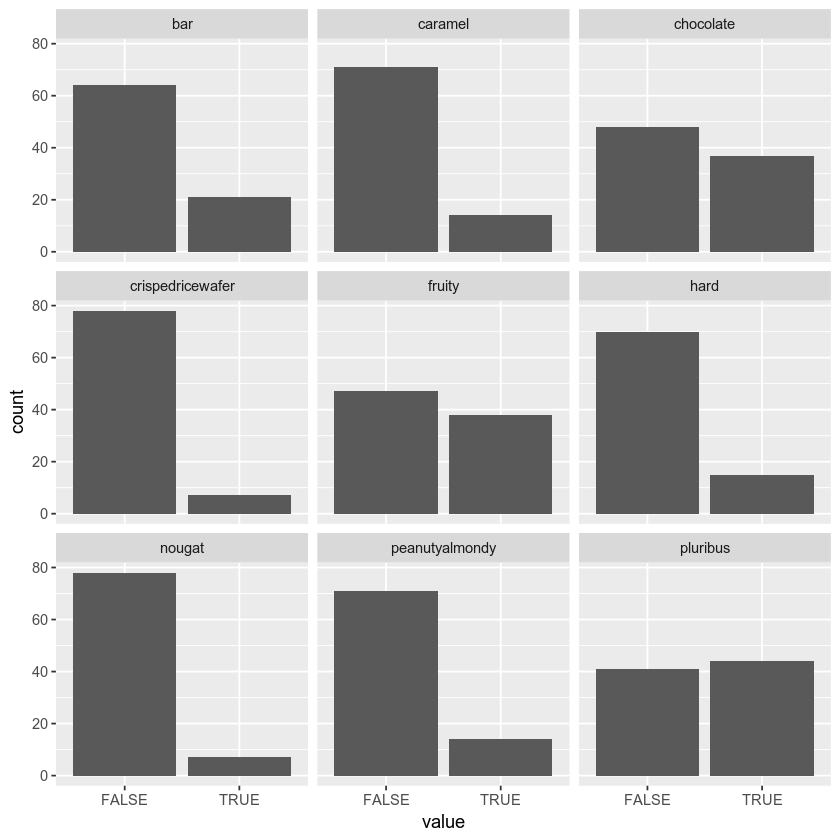

In [48]:
# Gather the categorical variables to make them easier to plot
candy_rankings_long <- gather(
  candy_rankings,
  key = "feature",
  value = "value",
  chocolate:pluribus
#   na.rm = FALSE,
#   convert = FALSE,
#   factor_key = FALSE
)

# print(candy_rankings_long)
# Make a bar plot showing the distribution of each variable
# .... YOUR CODE FOR TASK 2 ....

ggplot(candy_rankings_long, aes(value)) + geom_bar() + facet_wrap(~feature)


## 3. Taking a look at pricepercent
<p>Next, we'll look at the <code>pricepercent</code> variable. This variable records the percentile rank of the candy's price against all the other candies in the dataset. Let's see which is the most expensive and which is the least expensive by making a lollipop chart. One of the most interesting aspects of this chart is that a lot of the candies share the same ranking, so it looks like quite a few of them are the same price.</p>

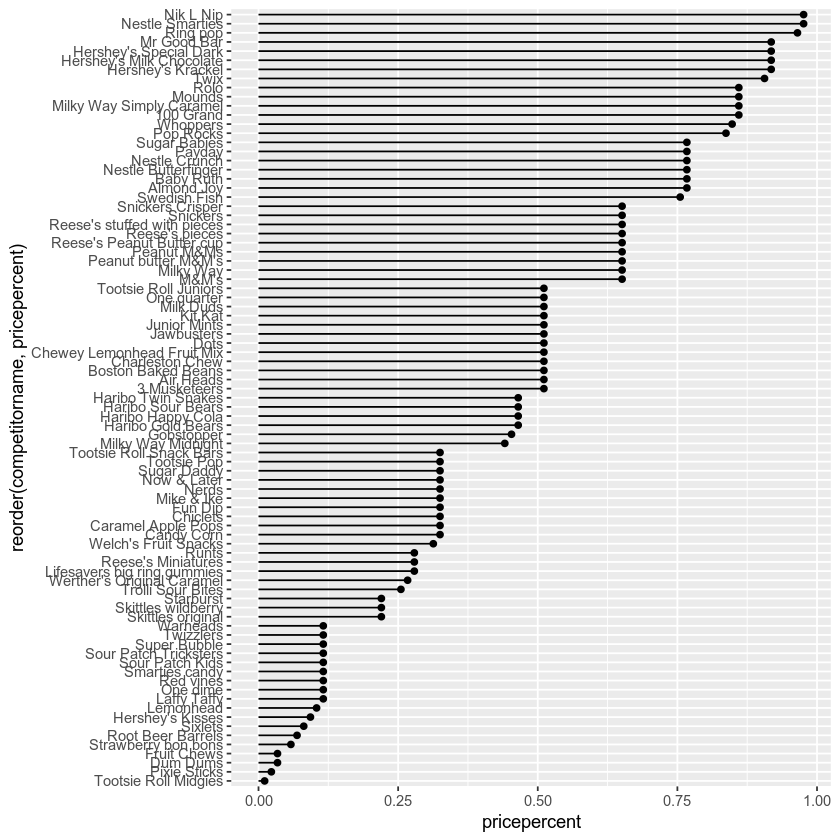

In [49]:
# Make a lollipop chart of pricepercent
# .... YOUR CODE FOR TASK 3 ....
ggplot(candy_rankings, aes(reorder(competitorname, pricepercent), pricepercent)) + 
geom_segment(aes(xend=reorder(competitorname, pricepercent),yend=0)) +
# geom_point( size=0.1, color="red", fill=alpha("orange", 0.1), alpha=0.7, shape=21, stroke=2) 
geom_point() + coord_flip() 

In [50]:
p <- last_plot()

run_tests({
    test_that("The plot is correct", {
        expect_equal(p$data, candy_rankings,
                    info = "Make sure you passed candy_rankings as the data argument to ggplot().")
        expect_equal(p$mapping, aes(reorder(competitorname, pricepercent), pricepercent),
                    info = "Did you pass the right aesthetics to aes() Make sure to reorder competitorname.")
        expect_equal(p$layers, list(geom_segment(aes(xend = reorder(competitorname, pricepercent), yend = 0)), geom_point()),
                    info = "The aesthetics in geom_segment() are not correct. Was xend= reordered correctly?")
        expect_equal(p$coordinates, coord_flip(),
                    info = "Did you flip the plot with coord_flip()?")
    })
})

ERROR: Error in run_tests({: could not find function "run_tests"


## 4. Exploring winpercent (part i)
<p>Moving on, we'll take a look at another numerical variable in the dataset: <code>winpercent</code>. This variable is the percentage of people who prefer this candy over another randomly chosen candy from the dataset. </p>
<p>We'll start with a histogram! The distribution of rankings looks symmetrical and seems to center on about 45%! </p>

In [ ]:
# Plot a histogram of winpercent
# .... YOUR CODE FOR TASK 4 ....
ggplot(candy_rankings, aes(winpercent)) + geom_histogram()

In [ ]:
p <- last_plot()

run_tests({
    test_that("The histogram is plotted correctly.",{
        expect_equal(p$data, candy_rankings,
                    info = "Make sure you used candy_rankings as the data argument in your ggplot().")
        expect_equal(p$mapping, aes(winpercent),
                    info = "Make sure you assigned winpercent to the x aesthetic.")
        expect_equal(p$layers, list(geom_histogram()),
                    info = "Make sure you used geom_histogram() to make your plot.")
    })
})

## 5. Exploring winpercent (part ii)
<p>Now that we've looked at the histogram, let's make another lollipop chart to visualize the rankings. It looks like Reese's Peanut Butter Cups are the all time favorite out of this set of candies!</p>

In [ ]:
# Make a lollipop chart of winpercent
# .... YOUR CODE FOR TASK 5 ....
# ggplot(candy_rankings, aes(reorder(competitorname, winpercent), winpercent)) + 
# geom_segment(aes(xend=reorder(competitorname, winpercent),yend=0)) +
# geom_point( size=0.1, color="red", fill=alpha("orange", 0.1), alpha=0.7, shape=21, stroke=2) + coord_flip() 


# Plot a histogram of winpercent
ggplot(candy_rankings, aes(winpercent)) +
  geom_histogram()

In [ ]:
p <- last_plot()

run_tests({
    test_that("The plot is correct", {
        expect_equal(p$data, candy_rankings,
                    info = "Make sure you passed candy_rankings as the data argument to ggplot().")
        expect_equal(p$mapping, aes(reorder(competitorname, winpercent), winpercent),
                    info = "Did you pass the right aesthetics to aes()? Make sure to reorder competitorname.")
        expect_equal(p$layers, list(geom_segment(aes(xend = reorder(competitorname, winpercent), yend = 0)), geom_point()),
                    info = "The aesthetics in geom_segment() are not correct. Was xend= reordered correctly?")
        expect_equal(p$coordinates, coord_flip(),
                    info = "Did you flip the plot with coord_flip()?")
    })
    # You can have more than one test
})

## 6. Exploring the correlation structure
<p>Now that we've explored the dataset one variable at a time, we'll see how the variables interact with one another. This is important as we get ready to model the data because it will give us some intuition about which variables might be useful as explanatory variables. </p>
<p>We'll use the <code>corrplot</code> package to plot a correlation matrix. Taking a look at this plot, it looks like chocolaty candies are almost never fruity. I can certainly see why that's the case! This also allows us to check for possible <a href="https://en.wikipedia.org/wiki/Multicollinearity">multicollinearity</a>, which can be a problem for regression modeling. It looks like we're good though!</p>

In [ ]:
# Plot the correlation matrix
# .... YOUR CODE FOR TASK 6 ....
candy_rankings %>% 
  select(-competitorname) %>% 
  cor() %>% 
  corrplot()

In [ ]:
student_cor <- .Last.value
good_cor <- candy_rankings %>%
  select(-competitorname) %>% 
  cor()

run_tests({
    test_that("The correlation matrix is created correctly", {
        expect_equal(student_cor, good_cor,
                    info = "Make sure you calculated the correlation matrix correctly.")
    })
})

## 7. Fitting a linear model of winpercent
<p><img src="https://assets.datacamp.com/production/project_458/img/snickers.jpg" style="float: left;margin:5px 20px 5px 1px;max-width: 33%"></p>
<p>Let's dive into the deep end of modeling by creating a linear model of <code>winpercent</code> using all the other variables except <code>competitorname</code>. </p>
<p>Because <code>competitorname</code> is a categorical variable with a unique value in every row, it is mathematically impossible to fit a linear model if it is included. Moreover, this variable doesn't add any information that the model could use because the names do not relate to any of the candies' attributes.</p>
<p>Let's fit the model! Then we can dive into exploring it. Maybe this will give us an idea of why people tend to prefer one candy over another!</p>

In [ ]:
# Fit a linear model of winpercent explained by all variables 
# except competitorname
win_mod <- lm(winpercent ~ . -competitorname, data = candy_rankings)

In [ ]:
good_mod <- lm(winpercent ~ . -competitorname, data = candy_rankings)

run_tests({
    test_that("The model is correct.", {
        expect_equal(good_mod$fitted.values, win_mod$fitted.values,
                        info = "Make sure you created the model correctly.")
    })
})

## 8. Evaluating the linear model
<p>Let's see how we did! We'll take a look at the results of our linear model and run some basic diagnostics to make sure the output is reliable.</p>
<p>Taking a look at the coefficients, we can make some conclusions about the factors that cause people to choose one candy over another. For example, it looks like people who took this survey really like peanut butter! There are a few other significant coefficients. Which ones are these?</p>

In [ ]:
# Take a look at the summary
# .... YOUR CODE FOR TASK 8 ....
summary(win_mod)

# Plot the residuals vs the fitted values
# .... YOUR CODE FOR TASK 8 ....
ggplot(augment(win_mod), aes(.fitted, .resid)) + 
  geom_point() + 
  geom_hline(yintercept = 0)

In [ ]:
p <- last_plot()

run_tests({
    test_that("The plot is correct.", {
        expect_equal(p$data, augment(win_mod),
                    info = "Make sure you called ggplot() on the augment()-ed win_mod.")
        expect_equal(p$mapping, aes(.fitted, .resid),
                    info = "Make sure you mapped .fitted to the x aesthetic and .resid to the y aesthetic.")
        expect_equal(p$layers, list(geom_point(), geom_hline(yintercept = 0)),
                    info = "Make sure you used geom_point() and geom_hline() to make your plot.")
    })
})

## 9. Fit a logistic regression model of chocolate
<p><img src="https://assets.datacamp.com/production/project_458/img/chocolate.jpg" style="float: left;margin:5px 20px 5px 1px;max-width: 33%"></p>
<p>Now let's try out logistic regression! We'll be trying to predict if a candy is chocolaty or not based on all the other features in the dataset. </p>
<p>A logistic regression is a great choice for this particular modeling task because the variable we're trying to predict is either <code>TRUE</code> or <code>FALSE</code>. The logistic regression model will output a probability that we can use to make our decision. </p>
<p>This model outputs a warning because a few of the features (like <code>crispedricewafer</code>) are only ever true when a candy is chocolate. This means that we cannot draw conclusions from the coefficients, but we can still use the model to make predictions!</p>

In [ ]:
# Fit a glm() of chocolate
choc_mod <- glm(chocolate ~ . - competitorname, family = "binomial", data = candy_rankings)

In [ ]:
good_mod <- glm(chocolate ~ . - competitorname, family = "binomial", data = candy_rankings)

run_tests({
    test_that("the model is correct.", {
        expect_equal(good_mod$fitted.values, choc_mod$fitted.values,
                        info = "Make sure you fit your logistic regression correctly.")
    })
})

## 10. Evaluate the logistic regression model
<p>Let's take our logistic regression model out for a spin! We'll start by creating a data frame of predictions we can compare to the actual values. Then we'll evaluate the model by making a confusion matrix and calculating the accuracy.</p>
<p>Looking at the summary, it looks like most of the coefficients aren't statistically significant. In this case, that's okay because we're not trying to draw any conclusions about the relationships between the predictor variables and the response. We're only trying to make accurate predictions and, taking a look at our confusion matrix, it seems like we did a pretty good job!</p>

In [ ]:
# Print the summary
summary(choc_mod)

# Make a data frame of predictions
preds <- augment(choc_mod, type.predict = "response") %>% 
  mutate(prediction = .fitted > .5)

# Create the confusion matrix
conf_mat <- preds %>%
  select(chocolate, prediction) %>% 
  table()

# Calculate the accuracy
accuracy <- sum(diag(conf_mat))/sum(conf_mat)
accuracy

In [ ]:
run_tests({
    test_that("The predictions are correct.", {
        expect_equal(augment(choc_mod, type.predict = "response") %>% mutate(prediction = .fitted > .5), preds,
                        info = "Make sure you created your predictions correctly.")
    })
    test_that("The confusion matrix is correct.", {
        expect_equivalent(preds %>% select(chocolate, prediction) %>% table(), conf_mat,
                        info = "Make sure you created the cofusion matrix correctly.")
    })
    test_that("The accuracy is correct.", {
        expect_equal(sum(diag(conf_mat))/sum(conf_mat), accuracy,
                        info = "Make sure you calculated the accuracy correctly.")
    })
})

In [ ]:
glimpse_result <- .Last.value


# These packages need to be loaded in the first @tests cell. 
library(testthat) 
library(IRkernel.testthat)

run_tests({
    test_that("Packages are loaded.", {
        expect_true("dplyr" %in% .packages(),
                   info = "Make sure you loaded dplyr.")
        expect_true("tidyr" %in% .packages(),
                   info = "Make sure you loaded tidyr.")
        expect_true("broom"  %in% .packages(),
                   info = "Make sure you loaded broom.")
        expect_true("corrplot" %in% .packages(),
                   info = "Make sure you loaded corrplot.")
        expect_true("fivethirtyeight" %in% .packages(),
                   info = "Make sure you loaded fivethirtyeight.")
    })
    test_that("Data is loaded.", {
        expect_equal(.GlobalEnv$candy_rankings, fivethirtyeight::candy_rankings,
                        info = "Did you call data(candy_rankings)?")
    })
    test_that("glimpse() was called", {
        expect_equal(candy_rankings, glimpse_result,
                    info = "Make sure you took a look at candy_rankings with glimpse().")
    })
})


In [ ]:
p <- last_plot()

run_tests({
    test_that("`candy_rankings_long` is correct", {
        expect_equal(candy_rankings_long, gather(candy_rankings, "feature", "value", chocolate:pluribus),
                        info = "Make sure you created candy_features_long by gathering the correct columns.")
    })
    test_that("The plot was created correctly", {
        expect_equal(p$data, candy_rankings_long,
                        info = "Make sure you passed candy_rankings_long as the data argument to ggplot().")
        expect_equal(p$mapping, aes(value),
                    info = "Did you map the value column to the x aesthetic?")
        expect_equal(p$layers, list(geom_bar()),
                    info = "Did you call geom_bar() to create a bar chart?")
        expect_equal(p$facet, facet_wrap(~feature),
                    info = "Did you create facet for each feature?")
    })
})